In [180]:
import numpy as np
import pylab
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as mtick
%matplotlib inline
import datetime
from datetime import date
import seaborn as sb
import time
import scipy.stats as stats
from scipy.stats import mstats
from scipy.stats import ttest_ind
from scipy import stats
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("Set2", 10)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [181]:
Batting = pd.read_csv('/Users/ezzan/Downloads/python_drills/Batting.csv')
Pitching = pd.read_csv('/Users/ezzan/Downloads/python_drills/Pitching.csv')
Salary= pd.read_csv('/Users/ezzan/Downloads/python_drills/Salaries.csv')
Award = pd.read_csv('/Users/ezzan/Downloads/python_drills/AwardsPlayers.csv')
Team = pd.read_csv('/Users/ezzan/Downloads/python_drills/Teams.csv')
HOF = pd.read_csv('/Users/ezzan/Downloads/python_drills/HallOfFame.csv')
AllStar= pd.read_csv('/Users/ezzan/Downloads/python_drills/AllstarFull.csv')
Fielding =pd.read_csv('/Users/ezzan/Downloads/python_drills/Fielding.csv')
Full =pd.read_csv('/Users/ezzan/Downloads/python_drills/Master.csv')
Appearances = pd.read_csv('/Users/ezzan/Downloads/python_drills/Appearances.csv')
Awards = pd.read_csv('/Users/ezzan/Downloads/python_drills/AwardsPlayers.csv')

In [182]:
HOF= HOF.sort_values('playerID')

HOF

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
2860,aaronha01,1982,BBWAA,415.0,312.0,406.0,Y,Player,NaN
3743,abbotji01,2005,BBWAA,516.0,387.0,13.0,N,Player,NaN
1305,adamsba01,1953,BBWAA,264.0,198.0,17.0,N,Player,NaN
1444,adamsba01,1955,BBWAA,251.0,189.0,24.0,N,Player,NaN
1390,adamsba01,1954,BBWAA,252.0,189.0,13.0,N,Player,NaN
1236,adamsba01,1952,BBWAA,234.0,176.0,9.0,N,Player,NaN
1144,adamsba01,1951,BBWAA,226.0,170.0,12.0,N,Player,NaN
1052,adamsba01,1950,BBWAA,168.0,126.0,6.0,N,Player,NaN
146,adamsba01,1937,BBWAA,201.0,151.0,8.0,N,Player,NaN
826,adamsba01,1948,BBWAA,121.0,91.0,4.0,N,Player,NaN


In [183]:
Batting.drop(['CS','SH', 'GIDP', 'IBB'], axis=1, inplace=True)

In [184]:
HOF2 = HOF.loc[lambda HOF: HOF['inducted'] == 'N', :]
HOF2

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
3743,abbotji01,2005,BBWAA,516.0,387.0,13.0,N,Player,NaN
1305,adamsba01,1953,BBWAA,264.0,198.0,17.0,N,Player,NaN
1444,adamsba01,1955,BBWAA,251.0,189.0,24.0,N,Player,NaN
1390,adamsba01,1954,BBWAA,252.0,189.0,13.0,N,Player,NaN
1236,adamsba01,1952,BBWAA,234.0,176.0,9.0,N,Player,NaN
1144,adamsba01,1951,BBWAA,226.0,170.0,12.0,N,Player,NaN
1052,adamsba01,1950,BBWAA,168.0,126.0,6.0,N,Player,NaN
146,adamsba01,1937,BBWAA,201.0,151.0,8.0,N,Player,NaN
826,adamsba01,1948,BBWAA,121.0,91.0,4.0,N,Player,NaN
770,adamsba01,1947,BBWAA,161.0,121.0,22.0,N,Player,NaN


In [42]:
HOF.drop(['needed_note'], axis=1, inplace=True)

In [43]:
HOF = HOF.loc[lambda HOF: HOF['category'] == 'Player', :]
HOF = HOF.loc[lambda HOF: HOF['inducted'] == 'Y', :]

In [44]:
#HOF= pd.merge(HOF, Batting, left_index=True, right_index=True, on='playerID', how='outer');
HOF = HOF.loc[lambda HOF: HOF['inducted'] == 'Y', :]
#HOF = HOF.merge(Batting, on='playerID',how='inner')
#HOF= HOF.loc[lambda HOF1: HOF1['category']=='Player']
HOF.head(50)


,playerID,yearid,votedBy,ballots,needed,votes,inducted,category
2860,aaronha01,1982,BBWAA,415.0,312.0,406.0,Y,Player
228,alexape01,1938,BBWAA,262.0,197.0,212.0,Y,Player
3913,alomaro01,2011,BBWAA,581.0,436.0,523.0,Y,Player
458,ansonca01,1939,Old Timers,NaN,NaN,NaN,Y,Player
2952,aparilu01,1984,BBWAA,403.0,303.0,341.0,Y,Player
1969,applilu01,1964,Run Off,201.0,NaN,189.0,Y,Player
3428,ashburi01,1995,Veterans,NaN,NaN,NaN,Y,Player
2582,averiea01,1975,Veterans,NaN,NaN,NaN,Y,Player
4120,bagweje01,2017,BBWAA,442.0,332.0,381.0,Y,Player
1483,bakerfr01,1955,Veterans,NaN,NaN,NaN,Y,Player


In [97]:
HOFstats["admitted"] = np.where(HOFstats['inducted'] == 'Y', 1, 0)

In [213]:
#master1 = master1.loc[lambda master1: master1['category'] == 'Player', :]
#HOF1 = HOF1.loc[lambda HOF1: HOF1['votedBY'] != 'Negro League', :]
MasterID = pd.merge(Batting, HOF, on='playerID')
#HOF= HOF1.sort_values('playerID')
MasterID["avg."]=MasterID.H/MasterID.AB
MasterID["1B"]=(MasterID.H-MasterID["3B"]-MasterID["2B"])
MasterID["OBP"]= (MasterID.H + MasterID.BB + MasterID.HBP ) / (MasterID.AB + MasterID.BB + MasterID.HBP + MasterID.SF)
MasterID["OBP"]= (MasterID.H + MasterID.BB + MasterID.HBP ) / (MasterID.AB + MasterID.BB + MasterID.HBP + MasterID.SF)
MasterID["slug"]=(MasterID["1B"] + 2*MasterID["2B"] + MasterID["3B"]*3 + 4*MasterID.HR)/MasterID.AB
MasterID["OPS"] = MasterID.OBP + MasterID.slug


#HOF.drop(['teamID', 'lgID','ballots','needed', 'votes'], axis=1, inplace=True)
Master1.drop(['category'])
#HOF1=HOF1.groupby(['playerID'])['HR']
MasterID = MasterID.sort_values('playerID')
MasterID.head(100)

NameError: name 'Master1' is not defined

In [144]:
 
HOFstats = Batting[["playerID", "HR", "RBI","G","H","2B","3B","AB","R","HBP","BB","SF","SO"]]

HOFstats['100Games'] = np.where(HOFstats['G'] >= 100, 1, 0)
HOFstats["avg."]=HOFstats.H/HOFstats.AB
HOFstats["1B"]=(HOFstats.H-HOFstats["3B"]-HOFstats["2B"])
HOFstats["OBP"]= (HOFstats.H + HOFstats.BB + HOFstats.HBP ) / (HOFstats.AB + HOFstats.BB + HOFstats.HBP + HOFstats.SF)
HOFstats["OBP"]= (HOFstats.H + HOFstats.BB + HOFstats.HBP ) / (HOFstats.AB + HOFstats.BB + HOFstats.HBP + HOFstats.SF)
HOFstats["slug"]=(HOFstats["1B"] + 2*HOFstats["2B"] + HOFstats["3B"]*3 + 4*HOFstats.HR)/HOFstats.AB
HOFstats["OPS"] = HOFstats.OBP + HOFstats.slug
#HOFstats["admitted"] = np.where(HOFstats["inducted"] == 'Y', 1, 0)
HOFstats = HOFstats.sort_values('playerID')
#HOFstats.head(100)


C:\Users\ezzan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\ezzan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\ezzan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [47]:
#HOFstats= HOFstats.loc[lambda HOFstats: HOFstats['G'] > 100, :]

In [146]:

Batting['avg.'] = Batting["H"]/Batting["AB"]
Batting = Batting.sort_values('avg.')
#HOFstats["admitted"] = np.where(HOFstats['inducted'] == 'Y', 1, 0)
#Batting= Batting.loc[lambda Batting: Batting['AB'] > 600, :]
HOFstats= pd.merge(HOF, HOFstats, left_index=True, right_index=True, on='playerID', how='inner');
HOFstats = HOFstats.sort_values('playerID')
#HOFstats.head(100)

In [147]:

HOFstats1= pd.merge(HOFstats, Batting, left_index=True, right_index=True, on='playerID', how='outer');
HOFstats1 = HOFstats1.sort_values('playerID')
#HOFstats1["admitted"] = np.where(HOFstats['inducted'] == 'Y', 1, 0)
#HOFstats1

Text(0.5,0,'Hrs Hit by Hall of Famers per season')

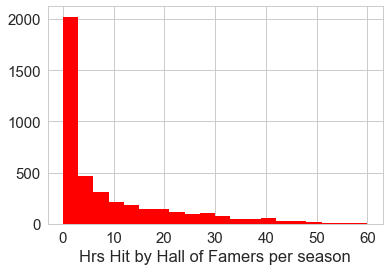

In [154]:
import matplotlib.pyplot as plt
plt.hist(MasterID['HR'].dropna(),bins=20, color = 'red')
plt.xlabel('Hrs Hit by Hall of Famers per season')


Text(0.5,0,'RBI by Hall of Famers')

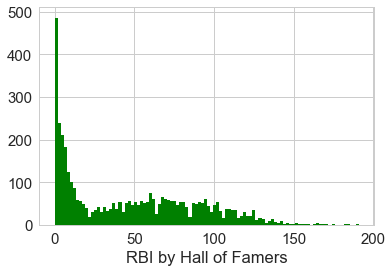

In [155]:
plt.hist(MasterID['RBI'].dropna(),bins=100, color = 'green')
plt.xlabel('RBI by Hall of Famers')

Text(0.5,0,'Hit by Hall of Famers')

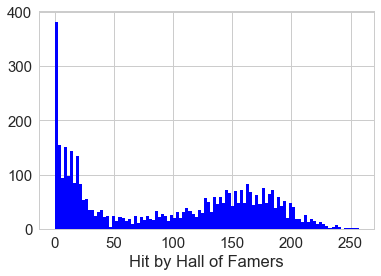

In [156]:
plt.hist(MasterID['H'].dropna(),bins=100, color = 'blue')
plt.xlabel('Hit by Hall of Famers')

Text(0.5,0,'OBP by Hall of Famers')

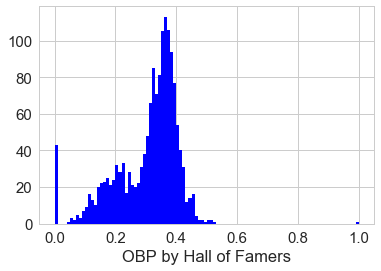

In [157]:
plt.hist(MasterID['OBP'].dropna(),bins=100, color = 'blue')
plt.xlabel('OBP by Hall of Famers')

Text(0.5,0,'Slugging Percentage by Hall of Famers per 100 games or more')

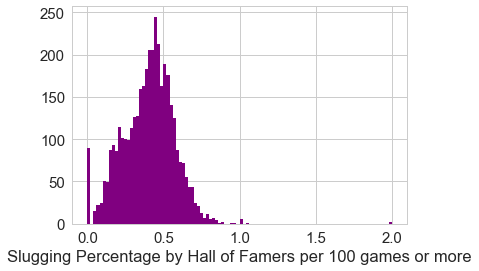

In [158]:
plt.hist(MasterID['slug'].dropna(),bins=100, color = 'purple')
plt.xlabel('Slugging Percentage by Hall of Famers per 100 games or more')

Text(0.5,0,'OPS by Hall of Famers per 100 games or more')

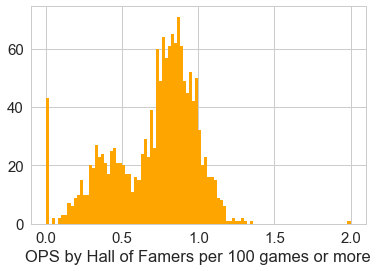

In [159]:
plt.hist(MasterID['OPS'].dropna(),bins=100, color = 'orange')
plt.xlabel('OPS by Hall of Famers per 100 games or more')

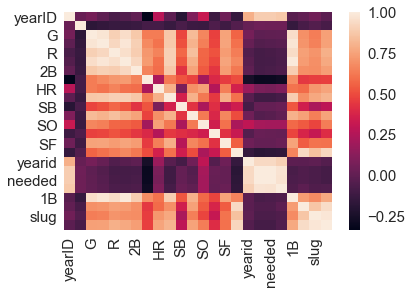

In [160]:
sb.heatmap(MasterID.corr())

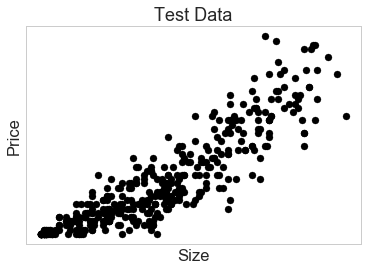

In [233]:

 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

Y = MasterID['HR']
X = MasterID['RBI']
 
X=X.values.reshape(len(X),1)
Y=Y.values.reshape(len(Y),1)   
 
# Split the data into training/testing sets
X_train = X[:-400]
X_test = X[-400:]
 
# Split the targets into training/testing sets
Y_train = Y[:-400]
Y_test = Y[-400:]
 
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.title('Test Data')
plt.xlabel('Size')
plt.ylabel('Price')
plt.xticks(())
plt.yticks(())


plt.show()

In [235]:
# Create linear regression object
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(X_train, Y_train)
 
# Plot outputs
plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [241]:
MasterID.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,SF,yearid,ballots,needed,votes,avg.,1B,OBP,slug,OPS
count,67764.000000,67764.000000,67764.000000,67764.000000,67764.000000,67764.000000,67764.000000,67764.000000,67764.000000,67753.000000,...,28267.000000,67764.000000,65795.000000,63205.000000,65795.000000,64193.000000,67764.000000,24850.000000,64193.000000,24830.000000
mean,1947.145933,1.052860,83.408536,279.040287,40.932058,79.283897,13.360841,3.182634,6.301901,38.196788,...,2.397778,1969.991470,327.218558,249.024539,57.719143,0.248216,62.740423,0.297013,0.372225,0.677415
std,28.973072,0.231662,53.678802,228.545160,39.442410,70.722263,13.107024,4.221526,9.705140,37.830538,...,2.867158,23.503282,127.441360,95.893409,91.298074,0.092361,55.560794,0.109278,0.170005,0.277904
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1936.000000,78.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1925.000000,1.000000,34.000000,59.000000,4.000000,10.000000,1.000000,0.000000,0.000000,4.000000,...,0.000000,1950.000000,226.000000,176.000000,2.000000,0.210526,9.000000,0.250000,0.272727,0.528912
50%,1945.000000,1.000000,80.000000,245.000000,30.000000,64.000000,9.000000,1.000000,2.000000,28.000000,...,1.000000,1967.000000,292.000000,225.000000,14.000000,0.266667,52.000000,0.325301,0.384211,0.733431
75%,1970.000000,1.000000,139.000000,516.000000,74.000000,146.000000,24.000000,5.000000,9.000000,66.000000,...,4.000000,1989.000000,432.000000,330.000000,75.000000,0.301020,115.000000,0.362369,0.474619,0.855817
max,2014.000000,4.000000,165.000000,705.000000,192.000000,257.000000,64.000000,28.000000,73.000000,191.000000,...,19.000000,2017.000000,581.000000,436.000000,555.000000,1.000000,213.000000,1.000000,3.000000,3.166667


In [243]:
MasterID.corr()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,SF,yearid,ballots,needed,votes,avg.,1B,OBP,slug,OPS
yearID,1.000000,0.041876,0.031789,-0.034977,-0.059659,-0.051430,-0.007029,-0.291812,0.262669,0.010070,...,0.081267,0.922822,0.870326,0.871945,0.328473,-0.083605,-0.041634,0.095155,0.088392,0.129331
stint,0.041876,1.000000,-0.174372,-0.151359,-0.138433,-0.142019,-0.132582,-0.099792,-0.087386,-0.132743,...,-0.119767,0.020348,0.019009,0.018298,-0.027339,-0.025906,-0.141914,-0.041526,-0.028674,-0.047364
G,0.031789,-0.174372,1.000000,0.973767,0.904756,0.950918,0.883874,0.664261,0.622502,0.871532,...,0.758291,0.045223,0.039478,0.040328,0.062163,0.479722,0.951425,0.539540,0.545061,0.598601
AB,-0.034977,-0.151359,0.973767,1.000000,0.940131,0.983800,0.913398,0.704545,0.622538,0.890251,...,0.776408,-0.012782,-0.015979,-0.015532,0.042941,0.509370,0.983254,0.560059,0.561989,0.625266
R,-0.059659,-0.138433,0.904756,0.940131,1.000000,0.960310,0.905480,0.736496,0.677913,0.901018,...,0.748403,-0.032833,-0.036604,-0.035748,0.063099,0.528378,0.952795,0.586725,0.612251,0.670054
H,-0.051430,-0.142019,0.950918,0.983800,0.960310,1.000000,0.936733,0.741575,0.629081,0.910627,...,0.772672,-0.030859,-0.035393,-0.034842,0.047935,0.558227,0.995556,0.583548,0.602480,0.651090
2B,-0.007029,-0.132582,0.883874,0.913398,0.905480,0.936733,1.000000,0.679323,0.627703,0.891254,...,0.753598,0.002653,-0.015172,-0.014002,0.051174,0.526730,0.904830,0.555450,0.607350,0.637678
3B,-0.291812,-0.099792,0.664261,0.704545,0.736496,0.741575,0.679323,1.000000,0.296929,0.649071,...,0.475630,-0.252863,-0.237344,-0.240137,-0.044373,0.423843,0.707701,0.369863,0.420184,0.406202
HR,0.262669,-0.087386,0.622502,0.622538,0.677913,0.629081,0.627703,0.296929,1.000000,0.811970,...,0.649991,0.252999,0.223460,0.226905,0.180294,0.329507,0.630107,0.477446,0.639890,0.655196
RBI,0.010070,-0.132743,0.871532,0.890251,0.901018,0.910627,0.891254,0.649071,0.811970,1.000000,...,0.803152,0.019487,0.005774,0.008129,0.081665,0.511382,0.899550,0.559877,0.670647,0.689305


In [236]:

X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)


In [239]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = KNeighborsClassifier(n_neighbors=10)
X = MasterID[['HR','RBI']]
Y = MasterID.inducted
neighbors.fit(X,Y)
print(neighbors.predict([[25,70]]))
print(neighbors.predict_proba([[25,70]]))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [240]:
X, y = MasterID, MasterID.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

AttributeError: 'DataFrame' object has no attribute 'target'

In [173]:
lr = LogisticRegression(C=1e9)


# Fit the model.
fit = lr.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, Y))

print('\n Percentage accuracy')
print(lr.score(X, Y))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [174]:
logisticregression = LogisticRegression(C=1e9)

# Fit the model.
fit = logisticregression.fit(X_train, Y_train)
predict_train = fit.predict(X_train)


# Cross-validate.
score = cross_val_score(logisticregression, X_train, Y_train, cv=5)

print(fit.score(X_train,Y_train))
print('\n Accuracy scores:')
print(score)
print('\n Average score:')
print(sum(score)/5)

NameError: name 'X_train' is not defined

In [ ]:
#HOF2= pd.merge(HOF2, Batting, left_index=True, right_index=True, on='playerID', how='inner');
#HOF = HOF.loc[lambda HOF: HOF['category'] == 'Player', :]
HOF = pd.merge(HOF,Batting, on='playerID')
HOF= HOF.sort_values("HR")
HOF.tail(100)

In [ ]:
master3= pd.merge(Pitching, HOF1, left_index=True, right_index=True, on='playerID', how='inner');
master3 = master3.loc[lambda master3: master3['category'] == 'Player', :]
master3 = pd.merge(Pitching, HOF1, on='playerID')
master3= master3.sort_values('playerID')
master3.drop(['teamID', 'lgID', 'votedBy', 'ballots','needed', 'votes'], axis=1, inplace=True)
master3


## The National Baseball Hall of Fame and Museum is located in Cooperstown, New York and was dedicated in 1939. A baseball player can be elected to the Hall of Fame if they meet the following criteria:

-The player must have competed in at least ten seasons;

-The player has been retired for at least five seasons;

-A screening committee must approve the player’s worthiness to be included on the ballot and most players who played regularly for ten or more years are deemed worthy;

-The player must not be on the ineligible list (that means that the player should not be banned from baseball);

-A player is considered elected if he receives at least 75% of the vote in the election; and

-A player stays on the ballot the following year if they receive at least 5% of the vote and can appear on ballots for a maximum of 10 years.

In [313]:
HOF

,votedBy,ballots,needed,votes,inducted,category
playerID,,,,,,
cobbty01,BBWAA,226.0,170.0,222.0,Y,Player
ruthba01,BBWAA,226.0,170.0,215.0,Y,Player
wagneho01,BBWAA,226.0,170.0,215.0,Y,Player
mathech01,BBWAA,226.0,170.0,205.0,Y,Player
johnswa01,BBWAA,226.0,170.0,189.0,Y,Player
lajoina01,BBWAA,226.0,170.0,146.0,N,Player
speaktr01,BBWAA,226.0,170.0,133.0,N,Player
youngcy01,BBWAA,226.0,170.0,111.0,N,Player
hornsro01,BBWAA,226.0,170.0,105.0,N,Player


In [314]:
HOF2 = HOF.loc[lambda HOF: HOF['category'] == 'Player', :]
HOF2 = HOF.loc[lambda HOF: HOF['inducted'] == 'N', :]

In [200]:
MasterID1 = pd.merge(Batting, HOF2, on='playerID', how="outer")
MasterID1 = MasterID1.loc[lambda MasterID1: MasterID1['yearID'] > 1980, :]
MasterID1 = MasterID1.loc[lambda MasterID1: MasterID1['yearid'] > 2005, :]
MasterID1= MasterID1.sort_values('votes', ascending = False)
MasterID1.head(100)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,HBP,SF,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
116044,biggicr01,1989.0,1.0,HOU,NL,134.0,443.0,64.0,114.0,21.0,...,6.0,5.0,2014.0,BBWAA,571.0,429.0,427.0,N,Player,NaN
116062,biggicr01,1998.0,1.0,HOU,NL,160.0,646.0,123.0,210.0,51.0,...,23.0,4.0,2014.0,BBWAA,571.0,429.0,427.0,N,Player,NaN
116048,biggicr01,1991.0,1.0,HOU,NL,149.0,546.0,79.0,161.0,23.0,...,2.0,3.0,2014.0,BBWAA,571.0,429.0,427.0,N,Player,NaN
116050,biggicr01,1992.0,1.0,HOU,NL,162.0,613.0,96.0,170.0,32.0,...,7.0,2.0,2014.0,BBWAA,571.0,429.0,427.0,N,Player,NaN
116052,biggicr01,1993.0,1.0,HOU,NL,155.0,610.0,98.0,175.0,41.0,...,10.0,5.0,2014.0,BBWAA,571.0,429.0,427.0,N,Player,NaN
116054,biggicr01,1994.0,1.0,HOU,NL,114.0,437.0,88.0,139.0,44.0,...,8.0,2.0,2014.0,BBWAA,571.0,429.0,427.0,N,Player,NaN
116056,biggicr01,1995.0,1.0,HOU,NL,141.0,553.0,123.0,167.0,30.0,...,22.0,7.0,2014.0,BBWAA,571.0,429.0,427.0,N,Player,NaN
116058,biggicr01,1996.0,1.0,HOU,NL,162.0,605.0,113.0,174.0,24.0,...,27.0,8.0,2014.0,BBWAA,571.0,429.0,427.0,N,Player,NaN
116060,biggicr01,1997.0,1.0,HOU,NL,162.0,619.0,146.0,191.0,37.0,...,34.0,7.0,2014.0,BBWAA,571.0,429.0,427.0,N,Player,NaN
116064,biggicr01,1999.0,1.0,HOU,NL,160.0,639.0,123.0,188.0,56.0,...,11.0,6.0,2014.0,BBWAA,571.0,429.0,427.0,N,Player,NaN


In [102]:
import functools
master1 = functools.reduce(lambda x,y: x.merge(y,on=['playerID']), [HOF,Batting])
master1 = master1.reset_index().groupby("playerID")
#master1.drop(['votedBy','ballots', 'needed','votes'], axis=1, inplace=True)

In [103]:
master1

In [31]:
pos_df = pd.DataFrame.from_dict(pos_dict, orient='index')